# Project 1

 

## Setup



In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [2]:
# Load data in easyshare.csv
d = pd.read_csv("easyshare.csv")

In [3]:
# Load data in easyshare_all.csv
d1 = pd.read_csv("easyshare_all.csv")

# Introduction

Dementia is a syndrome (a group of related symptoms) associated with an ongoing decline of brain functioning. There are many different causes of dementia, and many different types.Dementia symptoms may include problems with: memory loss thinking speed
mental sharpness and quickness, trouble speaking, understanding,difficulties doing daily activities. 

Research shows there are more than 944,000 people in the UK who have dementia. 1 in 11 people over the age of 65 have dementia in the UK.

The number of people with dementia is increasing because people are living longer. It is estimated that by 2030, the number of people with dementia in the UK will be more than 1 million

Although there is no cure for dementia at the moment, an early diagnosis means its progress can be slowed down in some cases, so the person may be able to maintain their mental function for longer.

A diagnosis helps people with dementia get the right treatment and support. It can also help them, and the people close to them, to prepare for the future.

[Source- https://www.nhs.uk/conditions/dementia/about-dementia/what-is-dementia/]

Therefore, it is important to analyse/predict the early factors that may result in development od Dimentia. The crucial symptom of Dimentia is Cognitive loss.

The following study aims to identify the most crucial modifiable features that may result in cognitive decline and suggest further initiatives/areas of importance that may help authorities reduce the development of Dimentia. 



### Objective- 

* To build a predictive model of the cognitive score of individuals that captures its underlying relationship with the various factors that have been collected. 

* Gain insights to advise on potential risk factors for dementia.In particular, the government officials and carer providers are interested in identifying modifiable risk factors that are amenableto lifestyle interventions. 

* To suggest potential lifestyle and/or government/societal interventions to reduce dementia risk. 

* Develop an explainable, validated model for cognitive score as the outcome of interest using features derived from the data provided and any additional sources.

For the purpose of this study, we use the EasyShare dataset, which contains a variety of variables covering different aspects of life. There are 5 main categories of variables included in the easySHARE dataset:

**Demographics:** This includes variables such as age, gender, country of birth, citizenship, education, religion, marital status, and age and gender of partner.

**Household composition:** Variables in this category cover living with a partner in the same household, household size, and information about children living in the household.

**Social support & network:** This category includes variables related to family and social support, such as whether the natural parents are still alive, number of children and grandchildren, residential proximity of children, number of living siblings, and information about received and given social support.

**Childhood conditions:** Variables in this category provide information about childhood conditions, such as the number of books at age ten, relative mathematical and language skills at age ten, childhood health status, and whether the individual was vaccinated during childhood.

**Health and health behavior:** This category covers variables related to health and health behavior, including self-perceived health, number of chronic diseases, mental health variables, depression scale (EURO-D), CASP-12 index for quality of life and well-being, health care utilization, grip strength, body mass index, smoking and drinking behavior, and engagement in vigorous activities/sports.

In total, the easySHARE dataset includes a comprehensive set of variables that capture various aspects of individuals' lives, allowing for a wide range of analyses and research.

# Exploratory Data Analysis and Feature Engineering

The factors for cognitive loss (which is directly linked with Dimentia) can be broadly categorised into two- Neuropathological Damage and Cognitive Reserve Detoriation. 
[See page 416 Dementia prevention, intervention, and care: 2020 report of
the Lancet Commission]

Neuropathological factors include physilogical factors that may contribute to dimenetia. Whereas, Cognitive reserve factors include psychological/social contributing aspects.

According to the easyShare and easyShare_all file, we will select the following variables for our study to evaluate both the types of features that contribute to Dimentia. 

**Cognitive factors-**

* `eduyears_mod`- Years in Education

* `books_age10`-  Books read by age 10 

* `maths_age10`-  Mathematical skills by age 10

* `language_age10`- Language skills by age 10
* `isced1997_r` - respondents educational level but also for respondents' children and former spouses' as well as interviewers 

**Psychological Factors- **

Perceived depressive symptoms scales-

* `euro1`- Depression (1-yes, 0-No)

* `euro2`- Pessimism   (1-Hopeful, 0-Not hopeful)

* `euro3`- Sucidal Feelings (1-presence of such feelings, 0-No)

* `euro4`- Guilt (1-Obvious/Excessive Guilt, 0-No such feelings)

* `euro5`- Sleep (1-Trouble Sleeping, 0-No trouble)

* `euro6`- Interest (1-Less interest, 0-No loss/change of interest)

* `euro7`- Irritability (1-Feeling irritable, 0-No such feelings)

* `euro8`- Appetite (1-Reduced, 0-No such feelings)

* `euro9`- Fatigue  (1-Tired, 0-No tiredness)

* `euro10`- Concentration (1-Difficulty concentrating, 0-No difficulty)

* `euro11`- Enjoyment (1-No enjoyable activities, 0-some enjoyment)

* `euro12`- Tearfulness (1-Yes, 0-No)

* `eurod`-  Depression scale EURO-D - high score indicates depression
 

* `bfi10_extra_mod` - Extraversion

* `bfi10_agree_mod`-  Agreebleness

* `bfi10_consc_mod`-  Conscientiousness

* `bfi10_neuro_mod`-  Neuroticism

* `bfi10_open_mod` -  Openess

(higher score indicates postive charecteristics)

**Social factors- **

* `casp`- Quality of life 

* `hhsize`- House size

* `mother_alive`- Is mother alive (1- yes, 5-no)

* `father_alive`- Is father alive (1- yes, 5-no)

* `ch001_`- No of Children

* `thinc_m`- Total household Income

**Neuropathological factors- **

* `female` - Gender (1- Female, 5-Male)

* `age` - Age (Float)

* `childhood_health` - Chidhood health Index (1-6)

* `chronic_mod` - Number of chronic diseases (0-10)

* `hc012_`- In hospital for last 12 months (1- Yes, 5- No)

* `bmi` - Body Mass Index

* `mobilityind` - Mobility Index (No. of motor limitations 0-4)

* `br015_`- Physical Inactivity (1-4)

* `smoking`- Smoker (Yes-1, No- 5)

* `br010_mod`- Drinking more than 2 glasses everyday (2.,-7.,)

**Target Variable-**

* `Cognitive Score`- Score used as a proxy for dementia severity and is a clinical measure that combines results from tests designed to assess cognitive function (namely, two numeracy tests, two word recall tests, and an orientation test). 


Since there are multiple factors that can be influential to development of Dimentia, we will differentiate data in the four categories and study the inter-relationship of those variables.

In [4]:
df_merged = pd.merge(d1, d[['mergeid', 'cogscore']], on='mergeid', how='left') #merging easyshare_all and easyshare

In [5]:
#Seperating feaures based on types of factors (eg. Cognitive, psychological, social, neuropathological)

cognitive_factors = ['eduyears_mod', 'books_age10', 'maths_age10', 'language_age10', 'cogscore']
psychological_factors = ['euro1', 'euro2', 'euro3', 'euro4', 'euro5', 'euro6', 'euro7', 'euro8', 'euro9', 'euro10', 'euro11', 'euro12', 'eurod', 'bfi10_extra_mod', 'bfi10_agree_mod', 'bfi10_consc_mod', 'bfi10_neuro_mod', 'bfi10_open_mod', 'cogscore']
social_factors = ['casp', 'hhsize', 'mother_alive', 'father_alive', 'ch001_', 'thinc_m', 'cogscore']
neuropathological_factors = ['female', 'age', 'childhood_health', 'chronic_mod', 'hc012_', 'bmi', 'mobilityind', 'br015_', 'smoking', 'br010_mod', 'cogscore']
target_variable = ['cogscore']

required_features = cognitive_factors + psychological_factors + social_factors + neuropathological_factors #All selected features 

Due to the multitude of factors, it is important to remember the nature of the data values and what they represent. Therefore, it was suitable to classify data variables based on the type of factors, since they may require different computational methods. Also, this helps in isolating the nature of factors that are most influential in development of dimentia. 

In [6]:
#Defining seperate dataframes for each type of factor. 

cog_f= df_merged[cognitive_factors].copy() #Data for Cognitive factors 
psy_f= df_merged[psychological_factors].copy() #Data for Psychological factors 
soc_f= df_merged[social_factors].copy() #Data for social factors 
neuro_f= df_merged[neuropathological_factors].copy() #Data for neuropathological factors 

#### EDA Plots 

*Correlation matrix analysis of different factors*

Since the variables included in each feature are belong to similar category, it is likely that there exists interdependency among th variables of each factor. We use correlation matrix to visualise and interpret those relationships. 

In [7]:
def correlation(df):
    """Takes a dataframe as input and return a correlation heatmap"""    
    correlation_matrix= df.corr()
    plt.figure(figsize=(10, 8)) 
    sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

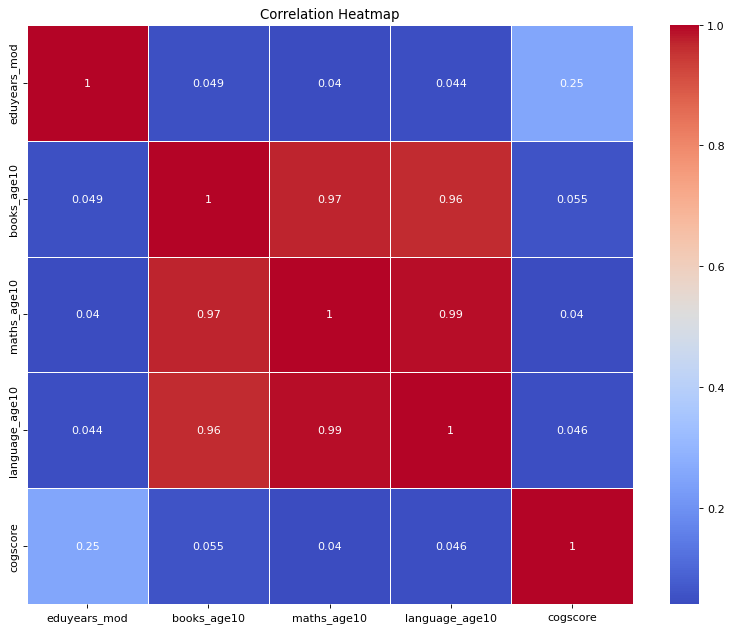

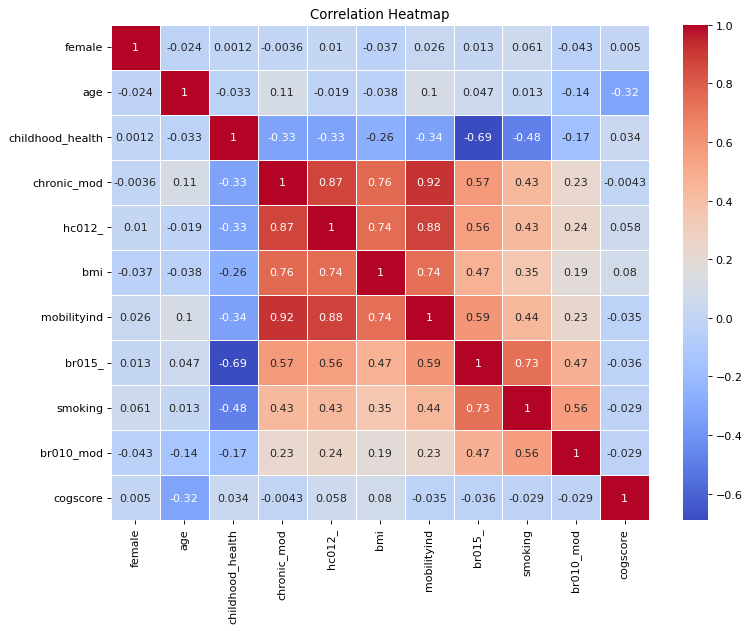

In [8]:
correlation(cog_f)
correlation(neuro_f) 

Cognitive features show high correlation among reading, mathematical and language proficiency at 10. But there is no strong correlation of these variables, with cogscore.

However, there is strong correlation of years in education with cognitive scores.

We developed a new feaure combining the cognitive level at age 10 using the three skills proficiency score.  

In [9]:
#Creating new column to take education level at 10
cog_f['education_10']= cog_f['books_age10']*cog_f['maths_age10']*cog_f['language_age10']

    Note: This feature was dropped later in the study

The neuropathological features do not show direct trong relationship with cognitive scores, except age. There is moderate negative correlation between age and cognitive scores. 

Also, there exists strong correlation among the variables. For example, there is strong positive correlation between smoking and drinking, bmi and mobility-index, etc. 

In feature engineering, it would be useful to define a combined variable that encaptures these relationships and can directly link them with the cognitive scores. 

For example, an effective bmi that is a product of age and bmi. 
or overall-health, that includes features of smoking, drinking, chronic disease and mobility. 

    Note: In preliminary study, these features were developed, but did not prove to be efficient/useful. 

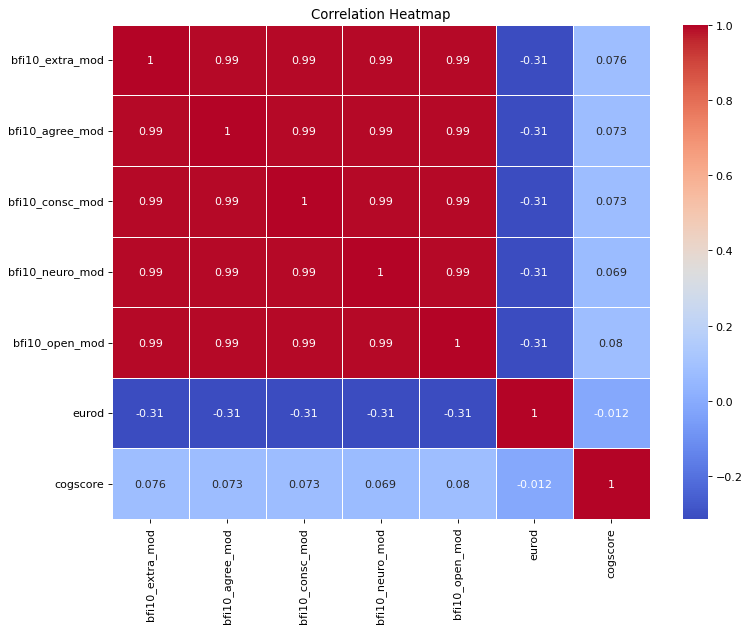

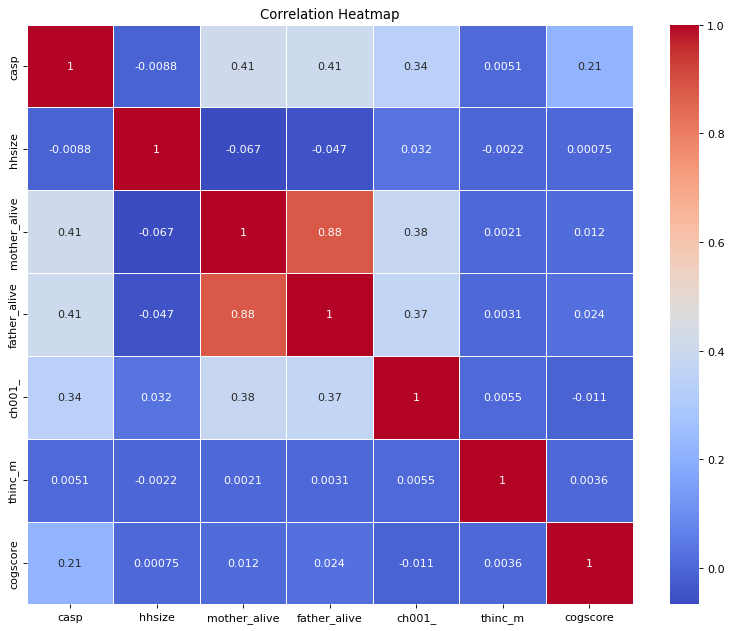

In [10]:
big_five= ['bfi10_extra_mod',
       'bfi10_agree_mod', 'bfi10_consc_mod', 'bfi10_neuro_mod',
       'bfi10_open_mod', 'eurod','cogscore']

correlation(psy_f[big_five])
correlation(soc_f)

The psychological factors matrix does not convey much about the relationship of cognitive scores with the considered psychological factors. The inter-correlation of variables also carries little importance sincee the variables were recorded in the same questionnaire.  

The Social features matrix show moderate correlation of cognitive scores with quuality of living. 

The inter-correlation among variables reinforces that the selection/classification of variables into different factors was an efficent choice. 

It is important to remember the nature of the variables when considering correlations. As it only conveys association of variables. Further relationship between variables should be analysed using regression models. 

#### Feature Engineering

To understand the relationship of different factors with cognitive score, we made use of decision trees and ensemble methods. We used Linear Regression, Random Tree Forest and Extra Trees Regression for this purpose. These methods can help deciphering which one-hot encoded variables are most influential in predicting the target variable. 
We found that Extra Trees Regression proved to be the best fit for our data. 

There are multiple values in the data set that are not suitable for the model. 

Negative values means missing data, not applicable or uncodable information. 

Furthermore, we will need to remove any 'NaN' values in the data, because they cause errors in model functioning. 

In [11]:
def remove_negative(df):
    """ Takes a data frame as input and replaces negative values with NA """
    for column in df.columns:
    # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[column]):
        # Replace negative values with NaN
            df.loc[df[column] < 0, column] = pd.NA
            
    return df

In [12]:
def remove_na(df):
    """ Takes a data frame as input and removes NA values"""
    df1= df.dropna()
    return df1

In [13]:
from sklearn.model_selection import train_test_split

#fn for splitting est and train data sets
def test_train(df1):
    rng = np.random.seed(0)
    
    df_1=remove_negative(df1) #removing non-negative values
    df= remove_na(df_1) #removing NaN values
    
    X = df.drop('cogscore', axis = 1)
    y = df['cogscore']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng)

    r= [X_train,y_train,X_test,y_test]
    return(r)

#### Identifying Relevant Features: 
Feature importance analysis can help us identify the most relevant features that contribute significantly to predicting cognitive scores for dementia risk. By understanding which features have the most significant impact on the outcome variable, we can focus our analysis and interventions on those factors that matter the most.

Therefore, feature importance analysis provides valuable insights into the relative importance of different factors influencing cognitive function and dementia risk. It aids in feature selection, model interpretation, identifying modifiable risk factors, validating hypotheses, and communicating results effectively.

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

def feature_importance(df):
    # Remove negative and NaN values
    df_cleaned = remove_na(remove_negative(df))
    
    # Extract features and target
    X_train, y_train, _, _ = test_train(df_cleaned)
    
    # Fit ExtraTreesRegressor model
    model = ExtraTreesRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = model.feature_importances_
    
    # Match feature importances with column names
    feature_importance_dict = dict(zip(X_train.columns, feature_importances))
    
    # Sort feature importances in descending order
    sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
    
    # Return sorted feature importances
    return sorted_feature_importances

Computing which features are most influential to the target variable-

In [15]:
feature_importance(psy_f)

[('bfi10_agree_mod', 0.15149749503096285),
 ('bfi10_extra_mod', 0.14806051284163702),
 ('bfi10_consc_mod', 0.12908130122366945),
 ('bfi10_neuro_mod', 0.12690656868480063),
 ('bfi10_open_mod', 0.08600596299373871),
 ('eurod', 0.06305148787543965),
 ('euro10', 0.04702700354927187),
 ('euro5', 0.03553764283690887),
 ('euro1', 0.031729379710730816),
 ('euro7', 0.030022444194241424),
 ('euro12', 0.027049603355288873),
 ('euro2', 0.026981048008119003),
 ('euro6', 0.01841237549155665),
 ('euro9', 0.018148332773899108),
 ('euro8', 0.015881642980518324),
 ('euro4', 0.015639219021364805),
 ('euro3', 0.014942868700236298),
 ('euro11', 0.014025110727615581)]

In [16]:
feature_importance(soc_f)

[('thinc_m', 0.8000637873409002),
 ('casp', 0.10733260764537016),
 ('ch001_', 0.04015086345347635),
 ('hhsize', 0.03120489612970593),
 ('mother_alive', 0.017494707671597838),
 ('father_alive', 0.0037531377589495128)]

In [17]:
feature_importance(neuro_f)

[('age', 0.31070390542536525),
 ('bmi', 0.22050765044465387),
 ('chronic_mod', 0.09896667771295484),
 ('childhood_health', 0.08915921626410397),
 ('br010_mod', 0.08368359502688144),
 ('mobilityind', 0.06280577350390926),
 ('br015_', 0.059883233763979526),
 ('hc012_', 0.02863886629466148),
 ('smoking', 0.024575601437523638),
 ('female', 0.021075480125966637)]

In [18]:
feature_importance(cog_f)

[('eduyears_mod', 0.4851810387987232),
 ('books_age10', 0.3390591459031647),
 ('maths_age10', 0.06591638521595572),
 ('education_10', 0.05897588997836089),
 ('language_age10', 0.050867540103795524)]

In [19]:
important_features= ['bfi10_agree_mod',
'bfi10_extra_mod',
'bfi10_consc_mod',
'bfi10_neuro_mod',
'thinc_m','casp','age','bmi','eduyears_mod', 'cogscore']

best_features= df_merged[important_features].copy()

In [20]:
feature_importance(best_features)

[('eduyears_mod', 0.17972700004004755),
 ('age', 0.13291477119828207),
 ('casp', 0.12993333217515407),
 ('thinc_m', 0.11984752583821308),
 ('bmi', 0.1035810165496927),
 ('bfi10_extra_mod', 0.08469449809304118),
 ('bfi10_agree_mod', 0.08462553071274276),
 ('bfi10_neuro_mod', 0.08343197973637638),
 ('bfi10_consc_mod', 0.08124434565645018)]

##### Interpretations from  Feature importance Analysis

The above feature importance analysis provided insights to what variables are most influential in contributing to the target variable. It helps in gaining supplementary information about the variables, which can be valuable irrespective of the varibales' inclusion in a subsequent model. 

* Psychological Factors- The big-five personality traits show high influence on the cognitive score. Followed by 'euro-D' (depression-index) then followed by the variables in euro-d index. This makes sense intuitively, because all the 'euro' variables contribute to 'euro-d'. If we interpret the meaning of variables with cognitive score, it implies- 

Trustingness, Introversion, Conscientiousness(laid-back nature) and Relaxed nature,  are   positively associated with cognitive skills. 
     
*Note that fature importance can only convey degree (rank) of association, not it's magnitude or nature (positive/negative). But here we can make nature interpretation because these variables are binary encoded. Eg. for `bfi10_extra`,1-reserved, 0-outgoing. So an assosiation with bfi10_extra would imply association with reserved nature. *
     
     
* Social factors- Total household income and quality of life are linked with cognitive skills. Intuitively, this association should be positive, but we cannot make assumptions. 


* Neuropathological Factors- Among the physiological features, Age and BMI are the highest contributers to cognitive skills. 


* Cognitive Features- Years in education and reading proficiency at age 10 is highly linked with cognitive skills. 
    

#### User Defined Helper Functions

The following functions are defined for computational purposes. 

model_fit: This function evaluates a fitted regression model and provides metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2). It also generates diagnostic plots if specified.

model_check Function: This function fits a specified model to the provided dataset, performs data preprocessing, and then evaluates the model using model_fit function.


These functions are essential for model evaluation and comparison. They automate the process of fitting multiple regression models, evaluating their performance, and providing diagnostic insights. This systematic approach helps in selecting the best-performing model for the given dataset and analysis objectives.

In [21]:
#Adapted from workshop 4 key
from sklearn.metrics import mean_squared_error, r2_score

def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return MSE, RMSE, Rsqr

In [22]:
def model_check(model, df):

    """Takes a model and data frame as input and returns MSE, RMSE,
    R-squared from using other functions (like model_fit) """

    df_1=remove_negative(df) #removing non-negative values
    df_2= remove_na(df_1) #removing NaN values
    
    model = model()
    model.fit(test_train(df_2)[0], test_train(df_2)[1])
    
    output= model_fit(model,test_train(df_2)[0], test_train(df_2)[1])
    
    return output 

The following code iterates over a list of regression models, fits each model to the dataset, and evaluates its performance using the model_check function.
For each model, it prints the model name along with the MSE, RMSE, and R-squared values.

It allows us to compare the performance of various regression models side by side. By evaluating multiple models simultaneously, we get insights into which algorithms are better suited for the dataset and further analysis. And by examining metrics such as MSE, RMSE, and R-squared across different models, we can identify the model that provides the most accurate predictions or the best fit to the data.

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.isotonic import IsotonicRegression

models= [LinearRegression, Ridge, Lasso, RandomForestRegressor, 
         GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor,
        KNeighborsRegressor,MLPRegressor,BaggingRegressor]


for model in models:
    m= model_check(model, best_features)
    print(model, m)

<class 'sklearn.linear_model._base.LinearRegression'> (11.559775146310528, 3.3999669331201634, 0.20308283308713937)
<class 'sklearn.linear_model._ridge.Ridge'> (11.559775146372955, 3.3999669331293436, 0.20308283308283592)
<class 'sklearn.linear_model._coordinate_descent.Lasso'> (11.663766839883301, 3.415225737763655, 0.19591376926231807)
<class 'sklearn.ensemble._forest.RandomForestRegressor'> (1.5453105633339186, 1.243105210082364, 0.8934681254136998)
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'> (10.617765617798826, 3.2584913100695583, 0.26802385098453896)
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> (11.37237471254613, 3.3722951698429555, 0.21600199638085027)
<class 'sklearn.ensemble._forest.ExtraTreesRegressor'> (0.0, 0.0, 1.0)
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> (9.174778353230337, 3.0289896588186527, 0.3675016789021761)
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'> (9425.55243030831, 97.08528431388719, -64

Based on the MSE, RMSE and R-squared values obtained, we canconclude the following-  

* Random forest and Extra Trees Regressor perform exceptionally well, indicating the importance of ensemble methods for this dataset. However, we will discard ExtraTreesRegression because a 100% predictive level does not indicate a good predictive model, since it fails to capture the randomness associated with the data. 

* Linear models (Linear, Ridge, Lasso) and boosting algorithms (AdaBoost, Gradient Boosting) perform relatively poorly compared to ensemble methods.

* MLP regressor shows signs of severe overfitting and instability, suggesting the need for regularization or hyperparameter tuning.

* Bagging regressor also performs well, indicating the benefits of bootstrap aggregation in reducing variance.

We decided to use the RandomForestRegressor for further analysis. 

# Model Fitting and Tuning

Data Preparation and Splitting: Preparing the dataset (best_features) by removing negative and NaN values. Then it splits the dataset into training and testing sets using train_test_split.

Initial Model Fitting: It fits a Random Forest regressor model to the training data (without any hyperparameter tuning).

Model Evaluation:The model_fit function is used to evaluate the performance of the initial model on the entire dataset (best_features). It calculates and prints Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2) values. 

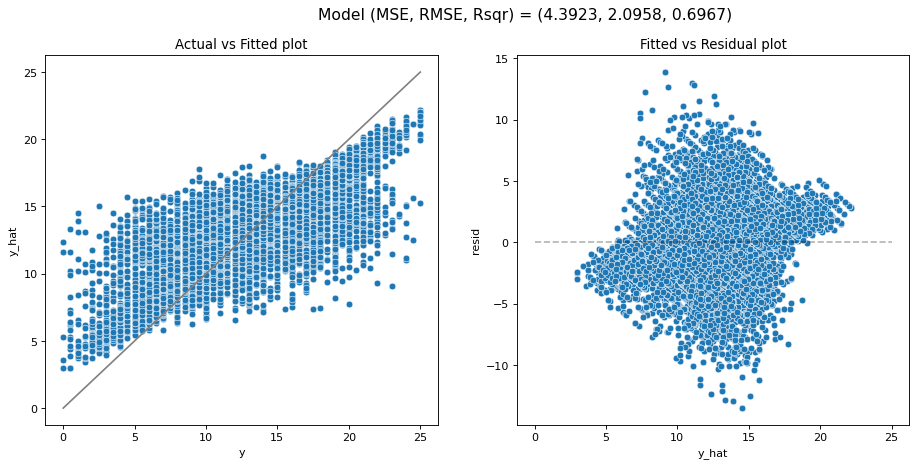

(4.392279514731635, 2.095776589890162, 0.6966746794433014)

In [24]:
from sklearn.ensemble import RandomForestRegressor

rng = np.random.seed(0)
    
bf =remove_negative(best_features) #removing non-negative values
best= remove_na(bf) #removing NaN values
    
X = best.drop('cogscore', axis = 1)
y = best['cogscore']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng)

model = RandomForestRegressor()

#model =BaggingRegressor()
model.fit(X_train,y_train) 


model_fit(m=model,X=X,y=y, plot= True) 


The actual vs fitted plot shows a reasonably linear relationship between the actual and predicted values, which suggests that the model is capturing the linear trend in the data. The residual vs fitted plot does not show any clear patterns, which suggests that the model's residuals are randomly distributed and there are no systematic errors in the model.

Overall, the model seems to be a reasonable fit for the data.

**Hyperparameter Tuning with GridSearchCV:** GridSearchCV is utilized to perform hyperparameter tuning on the Random Forest regressor. It searches for the best combination of max_depth parameter among the specified values.

In [25]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {'max_depth': [1, 3, 5, 10, 15]}

model= RandomForestRegressor()
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [26]:
print(best_model,best_params)

RandomForestRegressor(max_depth=10) {'max_depth': 10}


A subset of relevant features (relevant_features) is selected based on domain knowledge or feature importance analysis. The model is then trained and evaluated using only these selected features.

The final trained model is evaluated on both the training and testing datasets. Mean squared error and R-squared values are calculated and printed for both sets.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

relevant_features= ['eduyears_mod',
'age',
'casp',
'thinc_m',
'bmi']

# Use the best model for prediction
#y_pred = best_model.predict(X_test)


model1 = RandomForestRegressor(max_depth=10)

X_train_ = X_train[relevant_features]

model_fit = model1.fit(X = X_train_, y = y_train)

y_fit = model_fit.predict(X_train_)
# Predicted values

X_test_ = X_test[relevant_features]

y_pred = model1.predict(X_test_)  # predict on test set and store in y_pred
    
    
print(model)
# The mean squared error of the training set
print("Training Mean squared error: %.3f" % mean_squared_error(y_train, y_fit))
# The coefficient of determination of the training set
print("Training R squared: %.3f" % r2_score(y_train, y_fit))
# The mean squared error of the test set
print("Test Mean squared error: %.3f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination of the test set
print("Test R squared: %.3f" % r2_score(y_test, y_pred))
    



RandomForestRegressor()
Training Mean squared error: 8.789
Training R squared: 0.394
Test Mean squared error: 10.957
Test R squared: 0.240


A considerable factor in the defined model is that it only incorporates few features of the data set. This was done to facilitate efficient analysis. There are multiple reasons why more number of factors were not included- 


* All variables in the easyShare file are not 'compatible', i.e. they should not be compared (using regression/correlation techniques as adopted here) with each other, since they may not result in for meaningful interpretations. For example, the big-five personality traits showed significant importance in 'feature importance' assessment, however were not included in the final model. This was because the big-five personality traits were assessed based on a quick questionnaire (see pg. 66) involving binary encoding (1-yes, 0-no). Whereas, in our model, we used quantitave variables (chosen by feature importance). We did try to impliment the variables, but the resulting model was not very efficient. 


* Multitude of features result in 'overfitting'. One of our fist models included all variables of the best_features (chosen by feature importance), which resulted in a 1.00 value for R-squared with RandomForestRegressor. While a 100% predictive model may seem ideal, it does not convey any statistical importance, because it fails to capture the randomness associated with the real data set, therefore, holds little predictive importance. 


* There were also hit and trial methods used. Which involved trying different features from best_features in the same model. It was important to strike a balance between R-sq value for test and train data. Often, the train R-sq value was significantly higher than for the test set (70% vs 30%, 64% vs 12%, etc.) . This implied inconsistency and inefficiency in the model. Therefore, we ultimately chose these variables for building our model. 

### Comparision with Baseline Model

Following steps are taken to compare fitted model with baseline model-

**Define Baseline Models:**

**Mean Model:** Predict the mean of the target variable for all observations.

**Median Model:** Predict the median of the target variable for all observations.

**Simple Linear Regression:** Fit a simple linear regression model using one or a few features.


**Fit Baseline Models:** Fit each baseline model to the training data.


**Evaluate Baseline Models:** Use the trained baseline models to predict the target variable on the testing data. Calculate evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2) for each baseline model.


**Compare Baseline Models with Final Model:** Compare the performance metrics of the baseline models with those of the fitted model on the testing data.

We compare on basis of factors such as predictive accuracy, computational complexity, and interpretability.

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

# Define baseline models
mean_model = DummyRegressor(strategy='mean')
median_model = DummyRegressor(strategy='median')

# Fit baseline models
mean_model.fit(X_train, y_train)
median_model.fit(X_train, y_train)

# Predict with baseline models
y_pred_mean = mean_model.predict(X_test)
y_pred_median = median_model.predict(X_test)

# Evaluate baseline models
mse_mean = mean_squared_error(y_test, y_pred_mean)
mse_median = mean_squared_error(y_test, y_pred_median)
r2_mean = r2_score(y_test, y_pred_mean)
r2_median = r2_score(y_test, y_pred_median)

print("Mean Model:")
print("Mean Squared Error:", mse_mean)
print("R-squared:", r2_mean)

print("\nMedian Model:")
print("Mean Squared Error:", mse_median)
print("R-squared:", r2_median)


# Calculate evaluation metrics for the already trained and tested model
#and comparing with baseline model
mse_final = mean_squared_error(y_test, y_pred)
r2_final = r2_score(y_test, y_pred)

print("\nFinal Model:")
print("Mean Squared Error:", mse_final)
print("R-squared:", r2_final)


Mean Model:
Mean Squared Error: 14.421669492832622
R-squared: -5.435940719333843e-06

Median Model:
Mean Squared Error: 14.425806451612903
R-squared: -0.00029229463420143986

Final Model:
Mean Squared Error: 10.95710313856336
R-squared: 0.24022924626222775


#### Output Interpretation:

**Mean Squared Error (MSE):** MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance, as it reflects smaller prediction errors.

**Mean Model: MSE = 14.42
Median Model: MSE = 14.43
Final Model: MSE = 10.96**

The Final Model has the lowest MSE among the models, indicating that it provides the most accurate predictions compared to the baseline models.


**R-squared (R^2):** R-squared represents the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any variance.

**Mean Model: R^2 ≈ 0 (very close to zero)
Median Model: R^2 ≈ 0 (very close to zero)
Final Model: R^2 = 0.240**

The Final Model has a positive R-squared value, indicating that it explains approximately 24% of the variance in the target variable. While this might not be a high value, it's significantly better than the baseline models, which essentially have no explanatory power (R^2 ≈ 0).

###### Conclusion
The Final Model outperforms both the Mean and Median Models in terms of MSE and R-squared.
Although the R-squared of the Final Model is not high, it still provides a significant improvement over the baseline models, indicating its usefulness in predicting the target variable.
The Mean Squared Error and R-squared values provide complementary insights into the predictive performance and explanatory power of the models.

# Discussion & Conclusions

The proposed model aims to predict cognitive scores, which serve as a proxy for dementia severity, using a combination of demographic, lifestyle, and health-related factors. The model is built using machine learning techniques and is designed to assist government officials and charity directors in understanding the modifiable risk factors associated with dementia and making informed decisions regarding interventions and policies.

**Performance and Reliability:**
The performance of our final model is evaluated using metrics such as Mean Squared Error (MSE) and R-squared (R^2). The model exhibits a moderate level of predictive performance, with an MSE of 10.96 and an R^2 of 0.24 on the test data. While these metrics indicate that the model explains approximately 24% of the variance in cognitive scores, there is room for improvement in predictive accuracy.

It's important to note that the reliability of the model hinges on the quality and representativeness of the data used for training and testing. However, one of the major shortcomings would be lack of inclusiveness for all data values. For example, before building the model, we drop the column with 'NA' and negative values. This is not a very efficient method considering the original dataset had specific codes for missing values. (eg. -1: “Don’t know”, -2: “Refusal”, -5:“Not answered”, -7: “Not yet coded”, -9: “Not applicable”) "Not-applicable" has a different meaning than "Don'tknow", but we treated all missing values as the same and chose to eliminate them. 

Furthermore, the number of factors incorporated in the final model is considerably less, which only helps in explaining a 'portion' of the influence all variables have on cognitive development. 

As with any predictive model, there are inherent limitations and uncertainties associated with real-world data, which may affect the model's generalizability and robustness.

**Implications of the Model:**

The inclusion of various demographic, lifestyle, and health-related factors in the model provides valuable insights into the determinants of cognitive health and dementia risk. By analyzing the feature importances and coefficients of the model, we can identify key predictors that significantly influence cognitive scores.

Our model highlights the importance of factors such as education level, age, quality of life, household income, and BMI in predicting cognitive function. These findings underscore the complex interplay between socioeconomic status, health behaviors, and cognitive outcomes.

**Recommendations for Interventions:**

Based on the insights from our model, we propose the following recommendations for lifestyle changes and governmental/societal interventions to reduce dementia risk:

*Promoting Lifelong Learning:* Encourage individuals to pursue higher education and engage in lifelong learning activities to enhance cognitive reserve and resilience against cognitive decline.

*Healthy Aging Initiatives:* Implement public health campaigns promoting healthy aging behaviors, including regular physical activity, balanced nutrition, and weight management, to reduce the prevalence of obesity and its associated risks.

*Social Support Networks:* Foster social support networks and community engagement opportunities for older adults to combat social isolation and loneliness, which are linked to poorer cognitive outcomes.

*Access to Healthcare:* Ensure equitable access to healthcare services, including preventive screenings, chronic disease management, and mental health support, to address underlying health conditions and reduce the burden of modifiable risk factors.

*Environmental Modifications:* Create dementia-friendly environments and urban spaces that prioritize safety, accessibility, and cognitive stimulation for individuals living with dementia and their caregivers.

**Limitations of the Model:**

It's important to acknowledge the limitations of our model, including the simplifications and assumptions inherent in the predictive modeling process. The limitations of model are mentioned above along with the codes used. 

However, some other key limitations to consider include:

**Data Availability and Quality:** The model's performance may be affected by the availability and quality of data, as well as potential biases and inaccuracies in the data sources used. Furthermore, the type of data values is also a considerable factor. 

**Complexity of Dementia Risk Factors:** Dementia is a multifactorial condition influenced by genetic, environmental, and lifestyle factors. Our model may not capture all relevant factors or interactions contributing to dementia risk.

**Generalizability:** The model's findings may not be directly generalizable to all populations, as demographic and cultural factors can influence dementia risk profiles and outcomes.

Temporal Dynamics: The model's predictive power may be influenced by temporal changes in risk factors and healthcare practices, which may not be fully captured in the dataset.

**Conclusion:**

In conclusion, our final model represents a valuable tool for understanding the modifiable risk factors associated with dementia and informing targeted interventions and policies aimed at reducing dementia risk and promoting cognitive health. By leveraging insights from the model, policymakers, healthcare professionals, and community stakeholders can collaborate to develop evidence-based strategies that prioritize prevention, early detection, and comprehensive care for individuals at risk of dementia. However, it's essential to approach the model's findings with caution, considering its limitations and the complex nature of dementia risk factors. Continuous refinement and validation of the model are necessary to enhance its reliability and utility in addressing the pressing challenges associated with aging and dementia.

# References

* SHARE Release Guide (2022)


* Livingston et al (2020). Dementia prevention, intervention, and care: 2020 report of the Lancet Commission. Lancet. 396(10248):413-446.


* https://www.nhs.uk/conditions/dementia/

In [30]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project1.ipynb

[NbConvertApp] Converting notebook project1.ipynb to pdf
[NbConvertApp] Writing 258043 bytes to project1.pdf
